In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv("https://raw.githubusercontent.com/evgpat/edu_stepik_from_idea_to_mvp/main/datasets/clients.csv")

In [90]:
df.head()

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,...,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,neutral or dissatisfied
1,2,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,satisfied
2,3,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,...,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,satisfied
3,4,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied
4,5,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,...,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,satisfied


# Описание датасета
## Клиенты авиакомпании
Датасет содержит информацию о клиентах некоторой авиакомпании.

_Целевая переменная_ (таргет) – `satisfaction` (удовлетворенность клиента полетом), бинарная (_satisfied_ или _neutral or dissatisfied_)

### Признаки
- `Gender` (categorical: _Male_ или _Female_): пол клиента
- `Age` (numeric, int): количество полных лет
- `Customer Type` (categorical: _Loyal Customer_ или _disloyal Customer_): лоялен ли клиент авиакомпании?
- `Type of Travel` (categorical: _Business travel_ или _Personal Travel_): тип поездки
- `Class` (categorical: _Business_ или _Eco_, или _Eco Plus_): класс обслуживания в самолете
- `Flight Distance` (numeric, int): дальность перелета (в милях)
- `Departure Delay in Minutes` (numeric, int): задержка отправления (неотрицательная)
- `Arrival Delay in Minutes` (numeric, int): задержка прибытия (неотрицательная)

Признаки, перечисленные ниже, являются числовыми. По смыслу они категориальные: клиент ставил оценку от 1-го до 5-ти включительно. Есть выбросы!
- `Inflight wifi service` (categorical, int): оценка клиентом интернета на борту
- `Departure/Arrival time convenient` (categorical, int): оценка клиентом удобство времени прилета и вылета
- `Ease of Online booking` (categorical, int): оценка клиентом удобства онлайн-бронирования
- `Gate location` (categorical, int): оценка клиентом расположения выхода на посадку в аэропорту
- `Food and drink` (categorical, int): оценка клиентом еды и напитков на борту
- `Online boarding` (categorical, int): оценка клиентом выбора места в самолете
- `Seat comfort` (categorical, int): оценка клиентом удобства сиденья
- `Inflight entertainment` (categorical, int): оценка клиентом развлечений на борту
- `On-board service` (categorical, int): оценка клиентом обслуживания на борту
- `Leg room service` (categorical, int): оценка клиентом места в ногах на борту
- `Baggage handling` (categorical, int): оценка клиентом обращения с багажом
- `Checkin service` (categorical, int): оценка клиентом регистрации на рейс
- `Inflight service` (categorical, int): оценка клиентом обслуживания на борту
- `Cleanliness` (categorical, int): оценка клиентом чистоты на борту

## Исследование данных


In [91]:
df.shape

(129880, 24)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129549 non-null  object 
 2   Age                                129564 non-null  float64
 3   Customer Type                      129803 non-null  object 
 4   Type of Travel                     129779 non-null  object 
 5   Class                              129764 non-null  object 
 6   Flight Distance                    129786 non-null  float64
 7   Departure Delay in Minutes         129773 non-null  float64
 8   Arrival Delay in Minutes           129371 non-null  float64
 9   Inflight wifi service              129835 non-null  float64
 10  Departure/Arrival time convenient  129831 non-null  float64
 11  Ease of Online booking             1298

In [93]:
df.describe()

,id,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129880.000000,129564.000000,129786.000000,129773.000000,129371.000000,129835.000000,129831.000000,129837.000000,129842.000000,129830.000000,129834.000000,129832.000000,129833.000000,129836.000000,129834.000000,129832.000000,129838.000000,129817.00000,129843.000000
mean,64940.500000,40.113951,1323.385804,15.811301,16.651406,2.732183,3.061857,2.760523,2.981424,3.208349,3.256674,3.445691,3.361395,3.387181,3.356101,3.636107,3.310056,3.64718,3.289865
std,37493.270818,20.365190,4516.191530,93.206139,109.167328,1.359786,1.559323,1.430800,1.312628,1.357649,1.381889,1.349732,1.366866,1.335540,1.361633,1.221818,1.298626,1.21837,1.347625
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.00000,2.000000
50%,64940.500000,40.000000,846.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000,3.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.00000,4.000000
max,129880.000000,621.000000,379620.000000,22227.000000,14006.000000,45.000000,45.000000,45.000000,36.000000,45.000000,40.000000,45.000000,45.000000,45.000000,40.000000,40.000000,45.000000,40.00000,45.000000


In [94]:
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129549,129803,129779,129764,129880
unique,2,2,2,3,3
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65726,106040,89625,62103,58879


In [95]:
df.isnull().sum()

id                                     0
Gender                               331
Age                                  316
Customer Type                         77
Type of Travel                       101
Class                                116
Flight Distance                       94
Departure Delay in Minutes           107
Arrival Delay in Minutes             509
Inflight wifi service                 45
Departure/Arrival time convenient     49
Ease of Online booking                43
Gate location                         38
Food and drink                        50
Online boarding                       46
Seat comfort                          48
Inflight entertainment                47
On-board service                      44
Leg room service                      46
Baggage handling                      48
Checkin service                       42
Inflight service                      63
Cleanliness                           37
satisfaction                           0
dtype: int64

Количество пропусков (в процентах)

In [96]:
df.isnull().sum() * 100 /(df.shape[0])

id                                   0.000000
Gender                               0.254851
Age                                  0.243302
Customer Type                        0.059285
Type of Travel                       0.077764
Class                                0.089313
Flight Distance                      0.072374
Departure Delay in Minutes           0.082384
Arrival Delay in Minutes             0.391900
Inflight wifi service                0.034647
Departure/Arrival time convenient    0.037727
Ease of Online booking               0.033107
Gate location                        0.029258
Food and drink                       0.038497
Online boarding                      0.035417
Seat comfort                         0.036957
Inflight entertainment               0.036187
On-board service                     0.033877
Leg room service                     0.035417
Baggage handling                     0.036957
Checkin service                      0.032338
Inflight service                  

<ipython-input-97-0afae5eea124>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

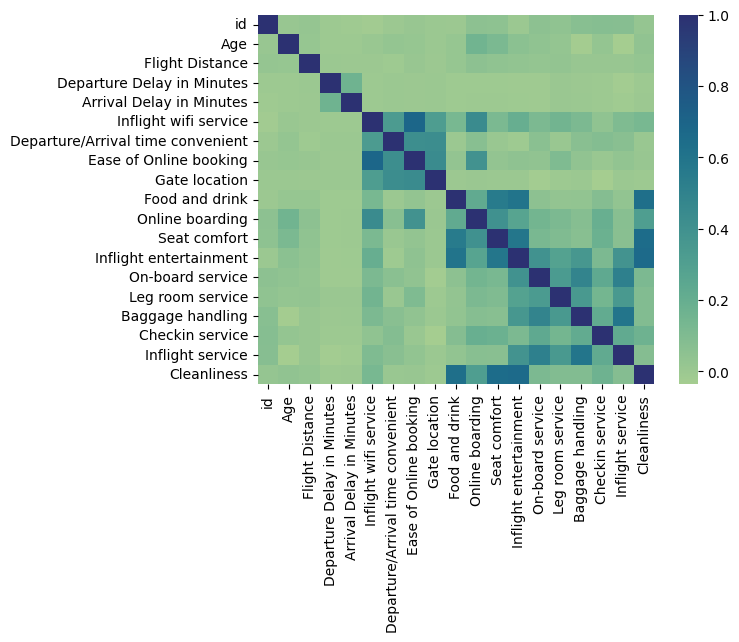

In [97]:
corr = df.corr()
sns.heatmap(corr, cmap="crest")

In [98]:
df.satisfaction.value_counts()

neutral or dissatisfied    58879
satisfied                  45025
-                          25976
Name: satisfaction, dtype: int64

In [99]:
df['satisfaction'].replace('-', 'neutral or dissatisfied', inplace = True)
df.satisfaction.value_counts()

neutral or dissatisfied    84855
satisfied                  45025
Name: satisfaction, dtype: int64

In [100]:
df = df[df['Age'] <= 125]

In [101]:
col = 'Age'
mode = df[col].mode()
df[col].fillna(mode, inplace = True)

<ipython-input-101-7c593c7d7ff9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(mode, inplace = True)


In [102]:
df['Gender'].value_counts(dropna=False)

Female    65393
Male      63475
NaN         330
Name: Gender, dtype: int64

In [103]:
df['Gender'].value_counts(dropna=False, normalize=True)

Female    0.506146
Male      0.491300
NaN       0.002554
Name: Gender, dtype: float64

In [104]:
df['Gender'].fillna("unknown", inplace=True)
df['Gender'].value_counts(dropna=False)

Female     65393
Male       63475
unknown      330
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

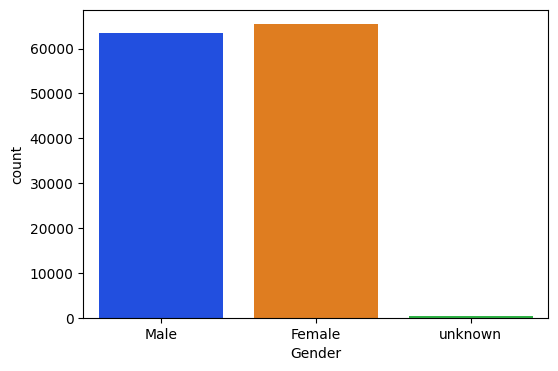

In [105]:
plt.figure(figsize=(6,4))

sns.countplot(x='Gender', data = df, palette='bright')

In [106]:
cols_to_fill = df.columns[6:23]

In [107]:
for col in cols_to_fill:
  mean = df[col].mean()
  df[col].fillna(mean, inplace = True)

In [108]:
df = df.dropna()

In [109]:
df.isnull().sum()

id                                   0
Gender                               0
Age                                  0
Customer Type                        0
Type of Travel                       0
Class                                0
Flight Distance                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
satisfaction                         0
dtype: int64

## Машинное обучение

In [237]:
X = df.drop(['id','satisfaction'], axis = 1)
y = df['satisfaction'] != 'satisfied'

In [238]:
y.head()

0     True
1    False
2    False
3    False
4    False
Name: satisfaction, dtype: bool

In [239]:
X = pd.get_dummies(X)

In [240]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((96681, 28), (32227, 28))

In [241]:
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()
ss.fit(X_train) # вычислить min, max по каждому столбцу

X_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

X_train.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Gender_Female,Gender_Male,Gender_unknown,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,0.528,0.001433,0.018618,0.017136,0.022222,0.066667,0.022222,0.083333,0.027778,0.03125,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.208,0.001336,0.000182,0.000000,0.066667,0.088889,0.066667,0.083333,0.138889,0.09375,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.360,0.001530,0.000000,0.000000,0.022222,0.022222,0.022222,0.027778,0.083333,0.12500,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.320,0.002286,0.002906,0.007497,0.111111,0.111111,0.111111,0.138889,0.111111,0.12500,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.360,0.005055,0.000454,0.000000,0.044444,0.111111,0.044444,0.083333,0.138889,0.06250,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [257]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 300, class_weight = 'balanced', penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=300, penalty='l1',
                   solver='liblinear')

In [258]:
pred = model.predict(X_test)

## Оценка модели

In [259]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score

In [260]:
print(f"recall: {recall_score(y_test, pred)}")
print(f"precision: {precision_score(y_test, pred)}")
confusion_matrix(y_test, pred)

recall: 0.8019160192555169
precision: 0.8992036769814548


array([[ 9360,  1886],
       [ 4156, 16825]])

In [264]:
pred_proba = model.predict_proba(X_test)[:,1]
pred2 = pred_proba > 0.34

In [265]:
print(f"recall: {recall_score(y_test, pred2)}")
print(f"precision: {precision_score(y_test, pred2)}")
confusion_matrix(y_test, pred2)

recall: 0.8721223964539345
precision: 0.852576647097195


array([[ 8082,  3164],
       [ 2683, 18298]])

In [266]:
importances = pd.DataFrame({'weights': model.coef_[0], 'features': X_train.columns}).sort_values(by='weights')
importances.head(28)

,weights,features
4,-15.407556,Inflight wifi service
9,-11.606680,Online boarding
15,-8.850495,Checkin service
12,-8.358274,On-board service
17,-5.355191,Cleanliness
13,-5.234560,Leg room service
11,-2.619886,Inflight entertainment
16,-2.550001,Inflight service
14,-2.473056,Baggage handling
10,-1.240455,Seat comfort


### Сохранение модели

In [267]:
import pickle

with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)

#а так модель можно загрузить из файла:
with open('model.pickle', 'rb') as f:
    model = pickle.load(f)

In [268]:
model

LogisticRegression(class_weight='balanced', max_iter=300, penalty='l1',
                   solver='liblinear')